Defined build_model and train_model
Defined the plot_the_model and plot_the_loss_curve functions.
Epoch 1/80
1/1 [==============================] - 0s 300ms/step - loss: 156.5713 - root_mean_squared_error: 12.5128
Epoch 2/80
1/1 [==============================] - 0s 10ms/step - loss: 98.2526 - root_mean_squared_error: 9.9122
Epoch 3/80
1/1 [==============================] - 0s 19ms/step - loss: 68.0730 - root_mean_squared_error: 8.2506
Epoch 4/80
1/1 [==============================] - 0s 7ms/step - loss: 48.7891 - root_mean_squared_error: 6.9849
Epoch 5/80
1/1 [==============================] - 0s 9ms/step - loss: 35.4690 - root_mean_squared_error: 5.9556
Epoch 6/80
1/1 [==============================] - 0s 7ms/step - loss: 25.9242 - root_mean_squared_error: 5.0916
Epoch 7/80
1/1 [==============================] - 0s 6ms/step - loss: 18.9619 - root_mean_squared_error: 4.3545
Epoch 8/80
1/1 [==============================] - 0s 8ms/step - loss: 13.8475 - root_mean_squared_error: 3.7212


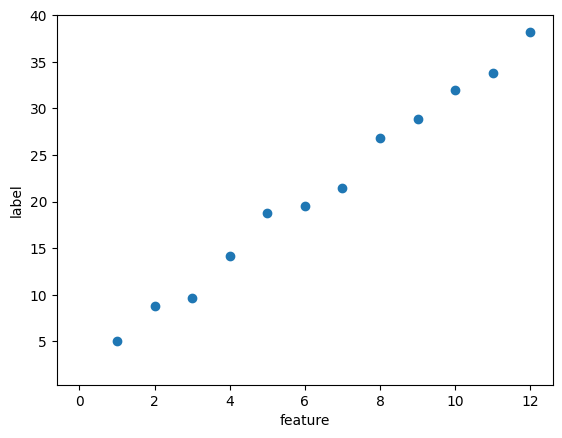

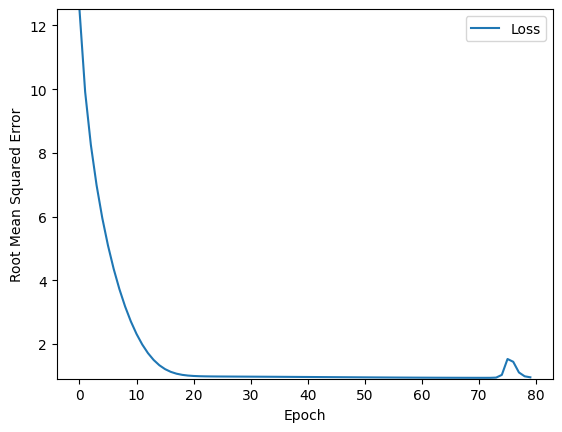

In [17]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
    """Create and compile a simple linear regression model."""
    # Most simple tf.keras models are sequential.
    # A sequential model contains one or more layers.
    model = tf.keras.models.Sequential()

    # Describe the topography of the model.
    # The topography of a simple linear regression model
    # is a single node in a single layer.
    model.add(tf.keras.layers.Dense(units=1,
                                    input_shape=(1,)))

    # Compile the model topography into code that
    # TensorFlow can efficiently execute. Configure
    # training to minimize the model's mean squared error.
    model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=my_learning_rate),
                  loss="mean_squared_error",
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])

    return model


def train_model(model, feature, label, epochs, batch_size):
    """Train the model by feeding it data."""

    # Feed the feature values and the label values to the
    # model. The model will train for the specified number
    # of epochs, gradually learning how the feature values
    # relate to the label values.
    history = model.fit(x=feature,
                        y=label,
                        batch_size=batch_size,
                        epochs=epochs)

    # Gather the trained model's weight and bias.
    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]

    # The list of epochs is stored separately from the
    # rest of history.
    epochs = history.epoch

    # Gather the history (a snapshot) of each epoch.
    hist = pd.DataFrame(history.history)

    # Specifically gather the model's root mean
    # squared error at each epoch.
    rmse = hist["root_mean_squared_error"]

    return trained_weight, trained_bias, epochs, rmse

print("Defined build_model and train_model")
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
    """Plot the trained model against the training feature and label."""

    # Label the axes.
    plt.xlabel("feature")
    plt.ylabel("label")

    # Plot the feature values vs. label values.
    plt.scatter(feature, label)

    # Create a red line representing the model. The red line starts
    # at coordinates (x0, y0) and ends at coordinates (x1, y1).
    x0 = 0
    y0 = trained_bias
    x1 = feature[-1]
    y1 = trained_bias + (trained_weight * x1)
    plt.plot(x0, y0, c='r')

    # Render the scatter plot and the red line.
    plt.show()


def plot_the_loss_curve(epochs, rmse):
    """Plot the loss curve, which shows loss vs. epoch."""

    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error")

    plt.plot(epochs, rmse, label="Loss")
    plt.legend()
    plt.ylim([rmse.min()*0.97, rmse.max()])
    plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

my_feature = np.array([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = np.array([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])
learning_rate=0.09999999
epochs=80
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)